# Бинарная регрессия

В файле bank-additional-full.csv содержаться данные о маркетинговой кампании банка.

Описание переменных

Bank client data:

    •	age (numeric)
    •	job : type of job (categorical)
    •	marital : marital status (categorical)
    •	education (categorical)
    •	default: has credit in default? (categorical)
    •	housing: has housing loan? (categorical)
    •	loan: has personal loan? (categorical)

Related with the last contact of the current campaign:

    •	contact: contact communication type (categorical)
    •	month: last contact month of year (categorical)
    •	day_of_week: last contact day of the week (categorical)
    •	duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

    •	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    •	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    •	previous: number of contacts performed before this campaign and for this client (numeric)
    •	poutcome: outcome of the previous marketing campaign (categorical)

Social and economic context attributes:

    •	emp.var.rate: employment variation rate - quarterly indicator (numeric)
    •	cons.price.idx: consumer price index - monthly indicator (numeric)
    •	cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    •	euribor3m: euribor 3 month rate - daily indicator (numeric)
    •	nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

    •	y - has the client subscribed a term deposit? (binary: 'yes','no')

# 1. Гипотезы



1. **job**
   - **H0 (нулевая гипотеза):** Нет статистически значимой зависимости между подпиской на срочный депозит и родом деятельности клиента.
   - **H1 (альтернативная гипотеза):** Существует статистически значимая зависимость между подпиской на срочный депозит и родом деятельности клиента.

2. **marital**
   - **H0 (нулевая гипотеза):** Нет статистически значимой зависимости между подпиской на срочный депозит и семейным положением клиента.
   - **H1 (альтернативная гипотеза):** Существует статистически значимая зависимость между подпиской на срочный депозит и семейным положением клиента.

3. **nr.employed**
   - **H0 (нулевая гипотеза):** Нет статистически значимой зависимости между подпиской на срочный депозит и числом сотрудников в фирме клиента.
   - **H1 (альтернативная гипотеза):** Существует статистически значимая зависимость между подпиской на срочный депозит и числом сотрудников в фирме.

4. **age**
   - **H0 (нулевая гипотеза):** Нет статистически значимой зависимости между подпиской на срочный депозит и возрастом клиента.
   - **H1 (альтернативная гипотеза):** Существует статистически значимая зависимость между подпиской на срочный депозит и возрастом клиента.

5. **education**
   - **H0 (нулевая гипотеза):** Нет статистически значимой зависимости между подпиской на срочный депозит и уровнем образования клиента.
   - **H1 (альтернативная гипотеза):** Существует статистически значимая зависимость между подпиской на срочный депозит и уровнем образования клиента.

6. **previous**
   - **H0 (нулевая гипотеза):** Нет статистически значимой зависимости между подпиской на срочный депозит и количеством контактов выполненных до этой компании клиента.
   - **H1 (альтернативная гипотеза):** Существует статистически значимая зависимость между подпиской на срочный депозит и количеством контактов выполненных до этой компании клиента.

Эти гипотезы могут быть использованы для проведения соответствующих статистических тестов с целью выявления влияния каждой из независимых переменных на подписку на срочный депозит.

# 2. Модель

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('csv_files/bank-additional-full.csv', sep = ';')

### Общие данные:

In [51]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Типы данных переменных:

In [53]:
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['age' 'duration' 'campaign' 'pdays' 'previous']

Type: object
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'y']

Type: float64
['emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']



### Процент пропущенных значений по переменным, содержащим пропуски:

In [54]:

missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing

,Процент пропущенных значений


### Зависимая переменная:

In [55]:
df['y'] = df['y'].replace({'no': 0, 'yes': 1})
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

### **Предикторы**

#### Возраст (референтная группа - 31 год)

In [56]:
df['age'].value_counts()

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

#### Количество контактов, выполненных до этой кампании и для этого клиента (референтная группа - 0)

In [57]:
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

#### Количество сотрудников - квартальный показатель (референтная группа - 5228.1)

In [58]:
df['nr.employed'].value_counts()

nr.employed
5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64

#### Тип работы (референтная группа - admin.)

In [59]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [60]:
job_dummies=pd.get_dummies(df.job, prefix='job', prefix_sep='_', dtype='int')
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


#### Семейное положение (реферетная группа - женат/замужем)

In [61]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [62]:
marital_dummies=pd.get_dummies(df.marital, prefix='marital', prefix_sep='_', dtype='int')
marital_dummies.head()

,marital_divorced,marital_married,marital_single,marital_unknown
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


#### Образование (референтная группа - имеющие высшее образование (university.degree))

In [63]:
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [64]:
education_dummies=pd.get_dummies(df.education, prefix='education', prefix_sep='_', dtype='int')
education_dummies.head()

,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0


#### Добавляем дамми-переменные в файл:

In [65]:
df = pd.concat([df, job_dummies, marital_dummies, education_dummies], axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,0,0,0,0,0,0,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,0,0,0,0,0,0,1,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,0,0,0,0,0,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,0,0,0,0,0,0,1,0,0


### Модель

In [66]:
df_model1 = df.dropna(subset=['age', 'previous', 'nr.employed', 'job_blue-collar',
                              'job_entrepreneur', 'job_housemaid', 'job_management',
                              'job_retired', 'job_self-employed', 'job_services',
                              'job_student', 'job_technician', 'job_unemployed',
                              'marital_divorced', 'marital_single',
                              'marital_unknown', 'education_basic.4y', 'education_basic.6y',
                              'education_basic.9y', 'education_high.school',
                              'education_illiterate', 'education_professional.course',
                              'education_unknown', 'y'])
df_model1.shape


(41188, 45)

In [67]:
x_mult = df_model1[['age', 'previous', 'nr.employed', 'job_blue-collar',
                              'job_entrepreneur', 'job_housemaid', 'job_management',
                              'job_retired', 'job_self-employed', 'job_services',
                              'job_student', 'job_technician', 'job_unemployed',
                              'marital_divorced', 'marital_single',
                              'marital_unknown', 'education_basic.4y', 'education_basic.6y',
                              'education_basic.9y', 'education_high.school',
                              'education_illiterate', 'education_professional.course',
                              'education_unknown']]

In [68]:
y = df_model1[['y']]
x_mult_constant = sm.add_constant(x_mult)
model1 = sm.Logit(y, x_mult_constant).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.294668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41164
Method:                           MLE   Df Model:                           23
Date:                Sat, 17 Feb 2024   Pseudo R-squ.:                  0.1629
Time:                        13:21:57   Log-Likelihood:                -12137.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            58.9762      1.231     47.892      0.000      56.563      61.390
age                               0.0035      0.002      1.756      0.079      -0.000       0.007
previous                          0.1579      0.027      5.892      0.000       0.105       0.210
nr.employed                      -0.0119      0.000    -49.786      0.000      -0.012      -0.011
job_blue-collar                  -0.3271      0.065     -5.034      0.000      -0.454      -0.200
job_entrepreneur                 -0.1960      0.104     -1.886      0.059      -0.400       0.008
job_housemaid                    -0.0418      0.121     -0.347      0.729      -0.278       0.195
job_management                   -0.1307      0.071     -1.831      0.067      -0.271       0.009
job_retired                       0.3403      0.089      3.844      0.000       0.167       0.514
job_self-employed                -0.1258      0.098     -1.285      0.199      -0.318       0.066
job_services                     -0.2713      0.072     -3.770      0.000      -0.412      -0.130
job_student                       0.3370      0.094      3.597      0.000       0.153       0.521
job_technician                   -0.0279      0.059     -0.474      0.636      -0.143       0.088
job_unemployed                    0.0689      0.105      0.659      0.510      -0.136       0.274
marital_divorced                 -0.0721      0.058     -1.251      0.211      -0.185       0.041
marital_single                    0.1002      0.043      2.336      0.020       0.016       0.184
marital_unknown                   0.2649      0.336      0.790      0.430      -0.393       0.923
education_basic.4y               -0.2170      0.076     -2.862      0.004      -0.366      -0.068
education_basic.6y               -0.1519      0.092     -1.643      0.100      -0.333       0.029
education_basic.9y               -0.2730      0.067     -4.051      0.000      -0.405      -0.141
education_high.school            -0.1920      0.050     -3.856      0.000      -0.290      -0.094
education_illiterate              0.9357      0.620      1.510      0.131      -0.279       2.150
education_professional.course    -0.1255      0.063     -2.002      0.045      -0.248      -0.003
education_unknown                -0.0578      0.086     -0.671      0.502      -0.227       0.111
=================================================================================================
"""

# 3. Уравнение

#### Уравнение:

In [69]:
equation = 'logit(p) = {:.4f}'.format(model1.params[0])  # Свободный член (intercept)

for i, param in enumerate(model1.params[1:], start=1):
    equation += ' + {:.4f} * {}'.format(param, x_mult_constant.columns[i])

print(equation)

logit(p) = 58.9762 + 0.0035 * age + 0.1579 * previous + -0.0119 * nr.employed + -0.3271 * job_blue-collar + -0.1960 * job_entrepreneur + -0.0418 * job_housemaid + -0.1307 * job_management + 0.3403 * job_retired + -0.1258 * job_self-employed + -0.2713 * job_services + 0.3370 * job_student + -0.0279 * job_technician + 0.0689 * job_unemployed + -0.0721 * marital_divorced + 0.1002 * marital_single + 0.2649 * marital_unknown + -0.2170 * education_basic.4y + -0.1519 * education_basic.6y + -0.2730 * education_basic.9y + -0.1920 * education_high.school + 0.9357 * education_illiterate + -0.1255 * education_professional.course + -0.0578 * education_unknown


/tmp/ipykernel_328326/535385021.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = 'logit(p) = {:.4f}'.format(model1.params[0])  # Свободный член (intercept)


Модель статистически значима и объясняет 16% изменчивости значений зависимой переменной.

#### Характеристика модели:

In [70]:
print('R^2 = {:f}'.format(model1.prsquared))
print('Model significance = {:f}'.format(model1.llr_pvalue))

R^2 = 0.162945
Model significance = 0.000000


# 4. Коэффициенты

#### Коэффициенты

In [71]:
coefs = pd.DataFrame()
coefs['Coefs'] = model1.params[1:]
coefs['Features'] = model1.params.index[1:]
coefs.set_index('Features', inplace=True)
coefs['OddsRatio'] = np.exp(coefs.Coefs)
display(coefs)

,Coefs,OddsRatio
Features,,
age,0.003525,1.003532
previous,0.157904,1.171054
nr.employed,-0.011878,0.988192
job_blue-collar,-0.327118,0.720999
job_entrepreneur,-0.195960,0.822045
job_housemaid,-0.041846,0.959017
job_management,-0.130748,0.877439
job_retired,0.340252,1.405302
job_self-employed,-0.125809,0.881783


In [72]:
def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'

In [73]:
pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals['10% level'] = model1.pvalues[1:].apply(lambda x: yes_no(x, level=0.1))
pvals

,p_values,5% level,10% level
Features,,,
age,0.079,non-significant,significant
previous,0.000,significant,significant
nr.employed,0.000,significant,significant
job_blue-collar,0.000,significant,significant
job_entrepreneur,0.059,non-significant,significant
job_housemaid,0.729,non-significant,non-significant
job_management,0.067,non-significant,significant
job_retired,0.000,significant,significant
job_self-employed,0.199,non-significant,non-significant


Нетрудно заметить, что только небольшое количество предикторов статистически значимы


*   Каждый дополнительный контакт, выполненный до этой кампании и для этого клиента увеличивает шансы на оформление депозита на 16%
*   При увеличении числа сотрудников шансы на  депозит снижаются на 1%
*   Принадлежность к рабочему классу уменьшает шансы на 33%
*   Принадлежность к пенсионерам уменьшает шансы на 34%
*   Наличие работы в сфере обслуживания уменьшает шансы на 27%
*   Принадлежность к студентам увеличивает шансы на 33%
*   Одиночество увеличивает шанс того, что человек подпишется на депозит на 10%
*   Наличие только 4 классов образования уменьшает шансы на 21%
*   Наличие только 9 классов образования уменьшает шансы на 27%
*   Наличие только среднего образования уменьшает шансы на 19%
*   Наличие только среднего профессионального образования уменьшает шансы на 12%

Остальные предикторы статистически незначимы.



# 5. Диагностика модели

### Остатки

In [74]:
p = stats.kstest(model1.resid_generalized, 'norm', args=(model1.resid_generalized.mean(), model1.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


/tmp/ipykernel_328326/1491037159.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1.resid_generalized, fit=stats.norm)


<Axes: ylabel='Density'>

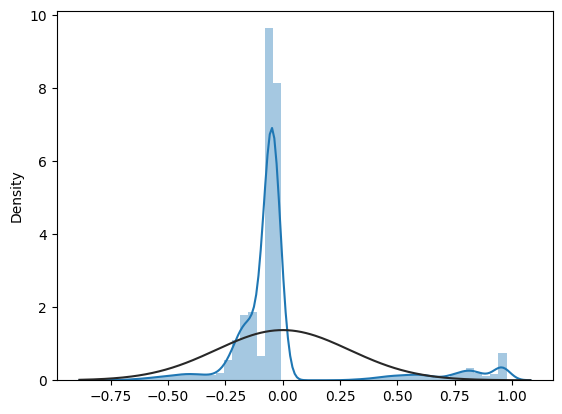

In [75]:
sns.distplot(model1.resid_generalized, fit=stats.norm)

Распределение остатков отличается от нормального распределения.

### Мультиколлинеарность

In [76]:
vifs = np.array([vif(model1.model.exog, i) for i in range(model1.model.exog.shape[1])])

In [77]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model1.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
15,1.002362,marital_unknown
20,1.003437,education_illiterate
13,1.070520,marital_divorced
12,1.091059,job_unemployed
8,1.112760,job_self-employed
4,1.121086,job_entrepreneur
5,1.175174,job_housemaid
10,1.178314,job_student
22,1.180721,education_unknown
6,1.225800,job_management


Нет значений VIF, превышающих 10. Проблема мультиколлинеарности отсутствует.

# 6. Выводы

* студенты и одинокие люди,  более склонны подписываться на срочные депозиты.
* рабочий класс, работники в сфере обслуживания, а также люди с 4-мя или 9-тью классами образования, средним или средним профессиональным образованием менее склонны к подписанию депозитов.
* уменьшение числа сотрудников и увеличение числа предыдущих контактов связано с увеличением вероятности подписания депозита.
1. job - H1 подтвердилась.
2. marital H1
3. nr.employed - H1
4. age -H0
5. education - H1
6. previous - H1

Результаты про людей с низким уровнем образования ожидаемы, в отличие от одиноких людей, потому что казалось бы, что наоборот, скорее семейные люди  должны интересоваться эффективными вложениями денег, для будущего детей, например.

Модель обладает статистической значимостью, объясняет 16% изменчивости значений зависимой переменной, лишена проблем мультиколлинеарности.